In [30]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [3]:
house = pd.read_csv("../data/raw/data_house.csv")

In [4]:
house.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
counts_zero = (house == 0).sum()
counts_zero

In [5]:
house = house.drop(["Unnamed: 0", "id", "date", "yr_renovated", "long", "lat"], axis = 1)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


<function matplotlib.pyplot.show(close=None, block=None)>

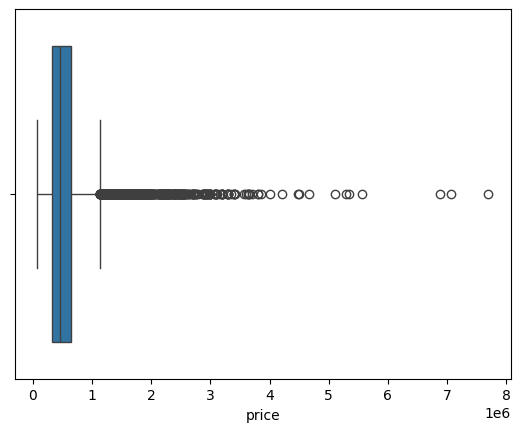

In [12]:
import seaborn as sns 
sns.boxplot(x=house["price"])
plt.show

In [13]:
#HINTS FROM IGNACIO:
# Step 1: Compute mean price per ZIP code and sort by the mean price
mean_price_per_zip = house.groupby('zipcode')['price'].mean()

# Step 2: Identify the cheapest ZIP code's mean price
min_price = mean_price_per_zip.min()

# Step 3: Create a ZIP code to price ratio mapping
zip_ratio_map = (mean_price_per_zip / min_price).to_dict()

# Step 4: Replace ZIP codes with their price ratio
house['zipcode'] = house['zipcode'].map(zip_ratio_map)

house[['zipcode']].head()

,zipcode
0,1.325796
1,2.003789
2,1.974014
3,2.354786
4,2.926387


In [8]:
features = house.drop(columns = ["price"])
target = house["price"]
	
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [18]:
Q1 = house["price"].quantile(0.25)
Q3 = house["price"].quantile(0.75)
IQR = Q3 - Q1

mask = (house["price"] >= (Q1 - 1.5 * IQR)) & (house["price"] <= (Q3 + 1.5 * IQR))
df = house[mask]

<function matplotlib.pyplot.show(close=None, block=None)>

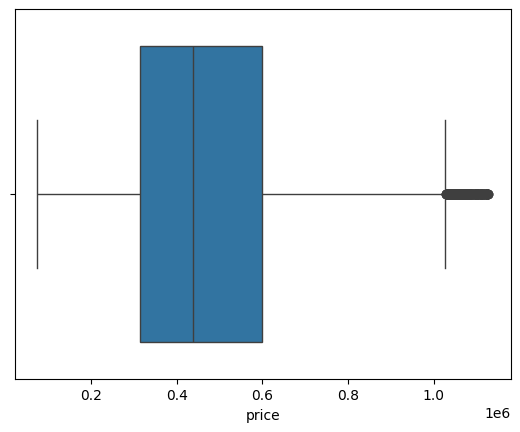

In [34]:
import seaborn as sns 
sns.boxplot(x=df["price"])
plt.show

In [35]:
features = df.drop(columns = ["price"])
target = df["price"]
	
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [36]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [37]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
2055,4,2.50,2190,7294,2.0,0,0,3,8,2190,0,2003,1.223868,2240,7379
12453,2,1.00,910,22725,1.0,0,0,1,6,910,0,1926,1.808598,2000,14566
16914,3,1.75,1610,144619,1.0,0,0,3,7,1610,0,1977,2.477876,2220,144619
6111,3,1.75,1370,8719,1.0,0,0,3,7,1370,0,1982,1.330147,1370,7525
9991,3,2.50,2170,4517,2.0,0,0,3,8,2170,0,2002,2.106642,2610,4770


In [38]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index)
X_train_norm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
2055,0.363636,0.333333,0.264256,0.004103,0.4,0.0,0.0,0.5,0.636364,0.350554,0.0,0.895652,0.027227,0.369604,0.007728
12453,0.181818,0.133333,0.086231,0.013451,0.0,0.0,0.0,0.0,0.454545,0.114391,0.0,0.226087,0.098344,0.321421,0.015984
16914,0.272727,0.233333,0.183588,0.087288,0.0,0.0,0.0,0.5,0.545455,0.243542,0.0,0.669565,0.179743,0.365589,0.165376
6111,0.272727,0.233333,0.150209,0.004967,0.0,0.0,0.0,0.5,0.545455,0.199262,0.0,0.713043,0.040153,0.194941,0.007896
9991,0.272727,0.333333,0.261474,0.002421,0.4,0.0,0.0,0.5,0.636364,0.346863,0.0,0.886957,0.134592,0.443887,0.004731


In [22]:
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)
X_test_norm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
17384,0.060606,0.18750,0.086038,0.000685,0.8,0.0,0.0,0.50,0.500000,0.125000,0.000000,0.860870,0.122083,0.180529,0.001148
722,0.121212,0.40625,0.330566,0.031085,0.4,0.0,0.0,0.75,0.916667,0.480263,0.000000,0.765217,0.298953,0.670811,0.046435
2680,0.060606,0.09375,0.086792,0.001926,0.0,0.0,0.0,0.50,0.500000,0.099781,0.049793,0.121739,0.178978,0.182280,0.004192
18754,0.060606,0.12500,0.063396,0.001284,0.0,0.0,0.0,0.75,0.583333,0.092105,0.000000,0.234783,0.335011,0.224304,0.002928
14554,0.121212,0.31250,0.218113,0.005502,0.4,0.0,0.5,0.50,0.666667,0.316886,0.000000,0.886957,0.098344,0.357380,0.016783


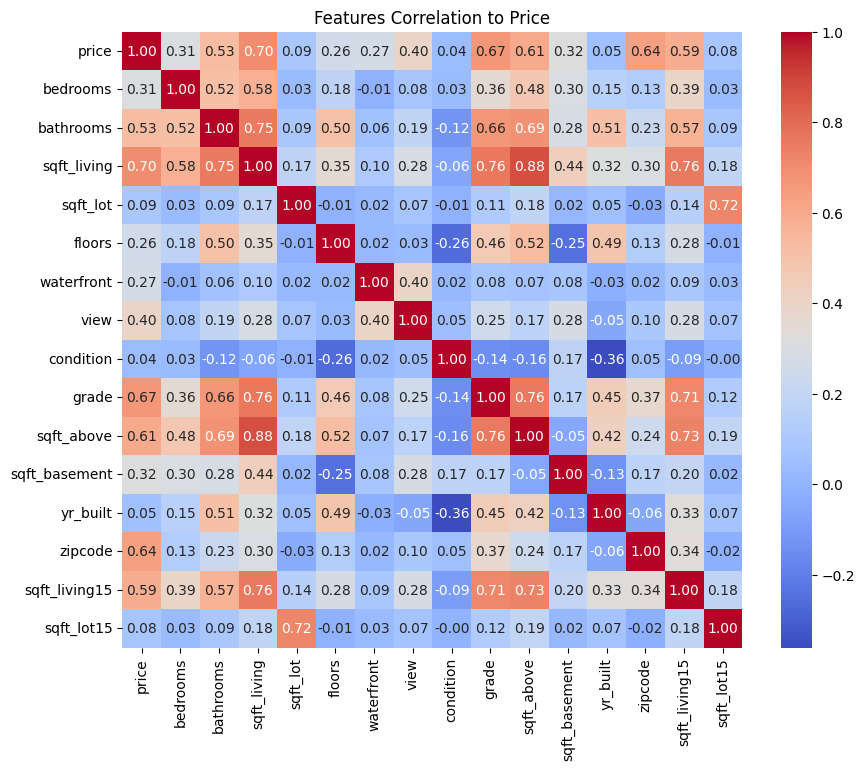

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = house.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Features Correlation to Price")
plt.show()

In [ ]:
spearman_corr = house.corr(method = "spearman")

plt.figure(figsize=(10,8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt =".2f")
plt.title(" Spearman Correlation (Non-linear)")
plt.show()

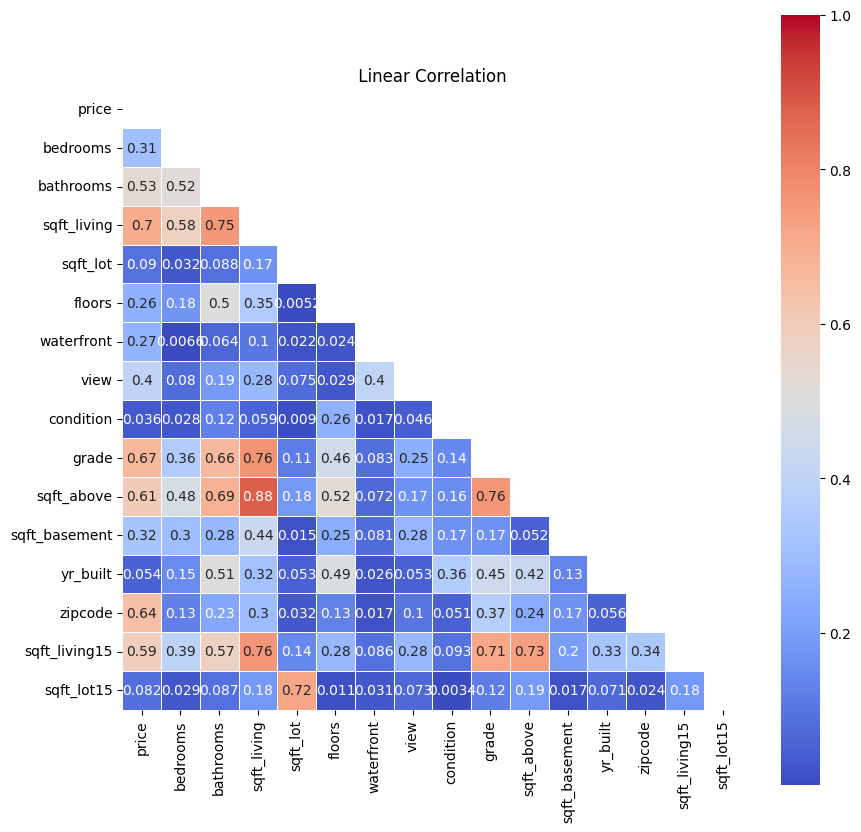

In [26]:
corr=np.abs(house.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cmap="coolwarm",annot = corr)
plt.title(" Linear Correlation ")
plt.show()

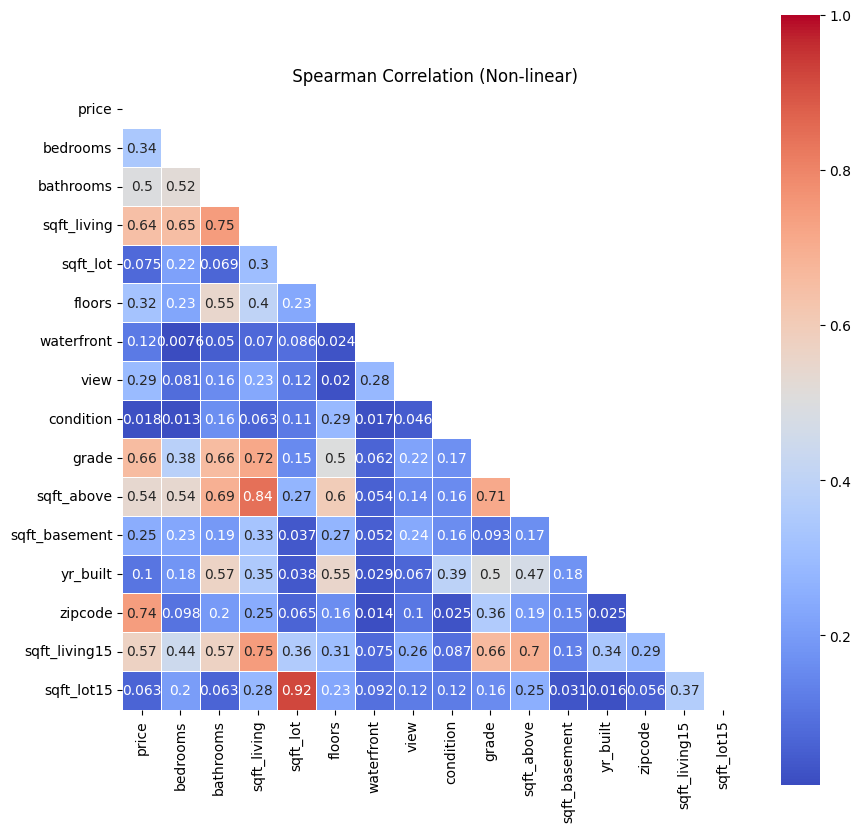

In [28]:
corr=np.abs(house.corr(method = "spearman")) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cmap="coolwarm",annot = corr)
plt.title(" Spearman Correlation (Non-linear)")
plt.show()

In [41]:
tree = DecisionTreeRegressor(max_depth=10)

In [43]:
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [47]:
y_pred_test_dt = tree.predict(X_test)

print(f"MAE, {mean_absolute_error(y_pred_test_dt, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"R2 score, {tree.score(X_test, y_test): .2f}")


MAE,  69378.24
MSE,  9783162216.42
RMSE,  98909.87
R2 score,  0.78
